In [1]:
from epi_model import *

In [2]:
with open('simulation_results/demo_round_5.pickle', 'rb') as inf:
    models = pickle.load(inf)

In [3]:
ks = sorted(models)

In [4]:
Nsims = max(len(v) for v in models.values())
if not np.std([len(v) for v in models.values()]) < 1e-10:
    print("Warning, not all simulations are the same Ns")
print(f"Nsims_max = {Nsims}")

Nsims_max = 200


In [5]:
means, stds = {}, {}
for k in ks:
    means[k] = np.mean( [ (m['numNodes'] - m['numS'])[-1] for m in models[k] ]  )
    stds[k] = np.std( [ (m['numNodes'] - m['numS'])[-1] for m in models[k] ]  )

In [6]:
add_args = ('vacc=0.20', 'inf=20')

k1 = ('friendHighDeg', *add_args)
k2 = ('rand', *add_args)
k3 = ('targetted', *add_args)

print(f"Main effect. {k1}: {means[k1]:0.1f} vs. {k2}: {means[k2]:0.1f}")
print(f"\t or, a {(means[k1] - means[k2])/means[k2]:0.1%} INCREASE")

Main effect. ('friendHighDeg', 'vacc=0.20', 'inf=20'): 62.9 vs. ('rand', 'vacc=0.20', 'inf=20'): 89.0
	 or, a -29.3% INCREASE


In [7]:
for add_args in sorted(set( tuple(x[1:]) for x in ks )):
    
    print(add_args)

    #k1 = ('friendHighDeg', *add_args)
    k2 = ('rand', *add_args)
    k1 = ('targeted', *add_args)

    print(f"Main effect. {k1}: {means[k1]:0.1f} vs. {k2}: {means[k2]:0.1f}")
    print(f"\t or, a {(means[k1] - means[k2])/means[k2]:0.1%} INCREASE")
    
    print()

('vacc=0.05', 'inf=10')
Main effect. ('targeted', 'vacc=0.05', 'inf=10'): 79.6 vs. ('rand', 'vacc=0.05', 'inf=10'): 100.9
	 or, a -21.1% INCREASE

('vacc=0.05', 'inf=20')
Main effect. ('targeted', 'vacc=0.05', 'inf=20'): 121.5 vs. ('rand', 'vacc=0.05', 'inf=20'): 139.5
	 or, a -12.9% INCREASE

('vacc=0.05', 'inf=5')
Main effect. ('targeted', 'vacc=0.05', 'inf=5'): 41.1 vs. ('rand', 'vacc=0.05', 'inf=5'): 59.0
	 or, a -30.3% INCREASE

('vacc=0.10', 'inf=10')
Main effect. ('targeted', 'vacc=0.10', 'inf=10'): 59.2 vs. ('rand', 'vacc=0.10', 'inf=10'): 83.7
	 or, a -29.3% INCREASE

('vacc=0.10', 'inf=20')
Main effect. ('targeted', 'vacc=0.10', 'inf=20'): 96.1 vs. ('rand', 'vacc=0.10', 'inf=20'): 118.1
	 or, a -18.7% INCREASE

('vacc=0.10', 'inf=5')
Main effect. ('targeted', 'vacc=0.10', 'inf=5'): 31.5 vs. ('rand', 'vacc=0.10', 'inf=5'): 45.6
	 or, a -31.0% INCREASE

('vacc=0.20', 'inf=10')
Main effect. ('targeted', 'vacc=0.20', 'inf=10'): 40.3 vs. ('rand', 'vacc=0.20', 'inf=10'): 54.2
	 or,

In [9]:
for k in sorted(ks, key=lambda k:means[k]):
    m = means[k]
    print(f'{k}: {m:0.1f}')

('friendHighDeg', 'vacc=0.50', 'inf=5'): 8.1
('targeted', 'vacc=0.50', 'inf=5'): 9.3
('rand', 'vacc=0.50', 'inf=5'): 11.2
('friendHighDeg', 'vacc=0.50', 'inf=10'): 17.1
('targeted', 'vacc=0.50', 'inf=10'): 18.3
('friendHighDeg', 'vacc=0.20', 'inf=5'): 20.1
('targeted', 'vacc=0.20', 'inf=5'): 20.1
('rand', 'vacc=0.50', 'inf=10'): 21.8
('targeted', 'vacc=0.10', 'inf=5'): 31.5
('friendHighDeg', 'vacc=0.50', 'inf=20'): 31.7
('friendHighDeg', 'vacc=0.10', 'inf=5'): 31.9
('rand', 'vacc=0.20', 'inf=5'): 32.2
('targeted', 'vacc=0.50', 'inf=20'): 36.1
('friendHighDeg', 'vacc=0.20', 'inf=10'): 36.8
('targeted', 'vacc=0.20', 'inf=10'): 40.3
('targeted', 'vacc=0.05', 'inf=5'): 41.1
('rand', 'vacc=0.50', 'inf=20'): 41.4
('rand', 'vacc=0.10', 'inf=5'): 45.6
('friendHighDeg', 'vacc=0.05', 'inf=5'): 47.2
('rand', 'vacc=0.20', 'inf=10'): 54.2
('rand', 'vacc=0.05', 'inf=5'): 59.0
('targeted', 'vacc=0.10', 'inf=10'): 59.2
('friendHighDeg', 'vacc=0.10', 'inf=10'): 61.2
('friendHighDeg', 'vacc=0.20', 'inf=

In [10]:
for k in sorted(ks, key=lambda x:(x[2],x[1],x[0])):
    m = means[k]
    print(f'{means[k]:0.1f} +/- {stds[k]/np.sqrt(Nsims):0.1f}          \t{k}')

83.3 +/- 2.5          	('friendHighDeg', 'vacc=0.05', 'inf=10')
121.0 +/- 3.8          	('none', 'vacc=0.05', 'inf=10')
100.9 +/- 3.1          	('rand', 'vacc=0.05', 'inf=10')
79.6 +/- 2.4          	('targeted', 'vacc=0.05', 'inf=10')
61.2 +/- 2.0          	('friendHighDeg', 'vacc=0.10', 'inf=10')
122.7 +/- 3.7          	('none', 'vacc=0.10', 'inf=10')
83.7 +/- 2.7          	('rand', 'vacc=0.10', 'inf=10')
59.2 +/- 1.9          	('targeted', 'vacc=0.10', 'inf=10')
36.8 +/- 1.2          	('friendHighDeg', 'vacc=0.20', 'inf=10')
127.6 +/- 3.7          	('none', 'vacc=0.20', 'inf=10')
54.2 +/- 1.8          	('rand', 'vacc=0.20', 'inf=10')
40.3 +/- 1.3          	('targeted', 'vacc=0.20', 'inf=10')
17.1 +/- 0.3          	('friendHighDeg', 'vacc=0.50', 'inf=10')
116.1 +/- 3.4          	('none', 'vacc=0.50', 'inf=10')
21.8 +/- 0.6          	('rand', 'vacc=0.50', 'inf=10')
18.3 +/- 0.4          	('targeted', 'vacc=0.50', 'inf=10')
124.1 +/- 2.5          	('friendHighDeg', 'vacc=0.05', 'inf=20'

In [11]:
def get_N(m, t):
    latest = np.max( np.where( m['tseries'] <= t ) )
    return m['numNodes'] - m['numS'][latest]

Text(0.5, 1.0, 'friendHighDeg')

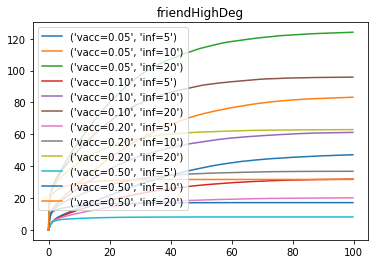

In [12]:
ts = np.arange(0,100, 0.2)
for k in models:
    if 'friendHighDeg' not in k:
        continue
    series = [np.mean( [get_N(m, t) for m in models[k]] ) for t in ts]
    plt.plot( ts, series, label=k[1:] )
plt.legend();
plt.title('friendHighDeg')

(20.0, 60.0)

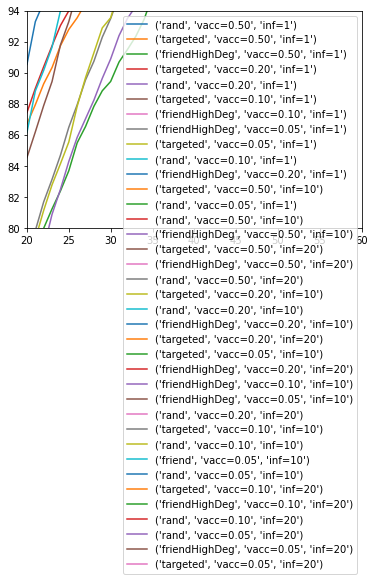

In [46]:
ts = np.arange(20,60, 1)

means = {}
for k in models:
    means[k] = np.mean( [ (m['numNodes'] - m['numS'])[-1] for m in models[k] ]  )
    
for k in sorted(models, key=lambda x:means[x]):
    series = [np.mean( [get_N(m, t) for m in models[k]] ) for t in ts]
    plt.plot( ts, series, label=k )
plt.legend();
plt.ylim(80,94)
plt.xlim(20,60)

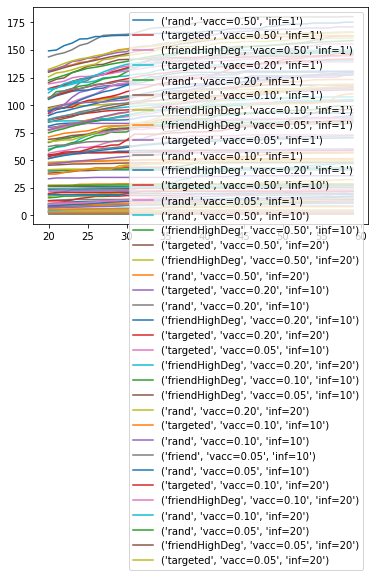

In [47]:
ts = np.arange(20,60, 1)

means = {}
for k in models:
    means[k] = np.mean( [ (m['numNodes'] - m['numS'])[-1] for m in models[k] ]  )
    
QUANTILE = 0.75
    
for k in sorted(models, key=lambda x:means[x]):
    series = [np.mean( [get_N(m, t) for m in models[k]] ) for t in ts]
    plt.plot( ts, series, label=k )
    
    smax = [np.quantile( [get_N(m, t) for m in models[k]], QUANTILE ) for t in ts]
    smin = [np.quantile( [get_N(m, t) for m in models[k]], 1-QUANTILE ) for t in ts]
    plt.plot(ts, smin)
    plt.plot(ts, smax)
    
plt.legend();
#plt.ylim(80,94)
#plt.xlim(20,60)

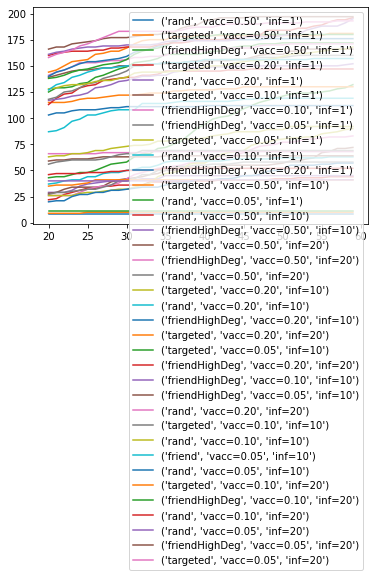

In [50]:
ts = np.arange(20,60, 1)

means = {}
for k in models:
    means[k] = np.mean( [ (m['numNodes'] - m['numS'])[-1] for m in models[k] ]  )
    
for k in sorted(models, key=lambda x:means[x]):
    series = [np.max( [get_N(m, t) for m in models[k]] ) for t in ts]
    plt.plot( ts, series, label=k )
plt.legend();
#plt.ylim(80,94)
#plt.xlim(20,60)

In [13]:
from scipy.stats import wilcoxon

In [14]:
wilcoxons = {}

for k1 in ks:
    for k2 in ks:
        if k1 == k2:
            val = np.nan
        else:
            val = wilcoxon( 
                [ (m['numNodes'] - m['numS'])[-1] for m in models[k1] ],
                [ (m['numNodes'] - m['numS'])[-1] for m in models[k2] ] 
            ).pvalue
        wilcoxons[(k1,k2)] = val

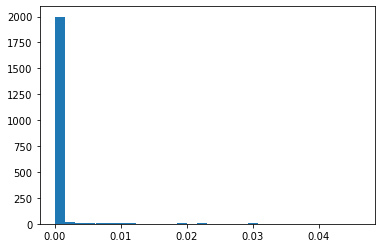

In [17]:
plt.hist( [x for x in wilcoxons.values() if x<0.05], bins=30 );

In [25]:
wilcox_mat = np.zeros((len(ks),len(ks)))

In [29]:
list(ks)[0]

('friendHighDeg', 'vacc=0.05', 'inf=10')

In [26]:
ksort = sorted(ks, key=lambda x:(x[2ksort],x[1],x[0]))

In [27]:
for (k1,k2), val in wilcoxons.items():
    wilcox_mat[ 
        ksort.index(k1),
        ksort.index(k2)
    ] = val

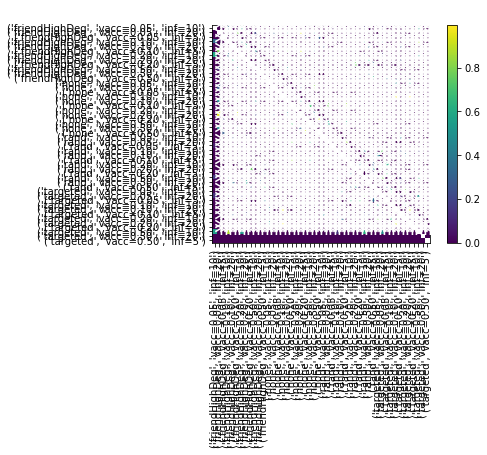

In [28]:
plt.imshow(wilcox_mat)
plt.xticks(range(len(ks)),ks,rotation='vertical')
plt.yticks(range(len(ks)),ks);
plt.colorbar();

for ki1 in range(len(ks)):
    for ki2 in range(len(ks)):
        if wilcox_mat[ki1,ki2] < 0.05:
            plt.text( ki1-0.25, ki2+0.5, "*", color='white', size=30 )

In [ ]:
ks = sorted(models, key=lambda x:means[x])

In [ ]:
ks.remove('none')

In [ ]:
ks

In [ ]:
stds

In [ ]:
plt.errorbar?

In [ ]:
marr = np.array([means[k] for k in ks])
sarr = np.array([stds[k] for k in ks])
N = len(models['none'])

plt.bar(
    ks,
    marr
)
plt.errorbar(
    ks,
    marr,
    yerr=sarr/np.sqrt(N),
    color='black'
)
plt.ylim(88,93)
plt.xticks(ks, rotation='vertical');

In [69]:
types = set([tuple(list(k)[1:]) for k in ks])

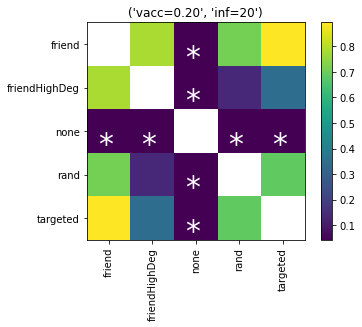

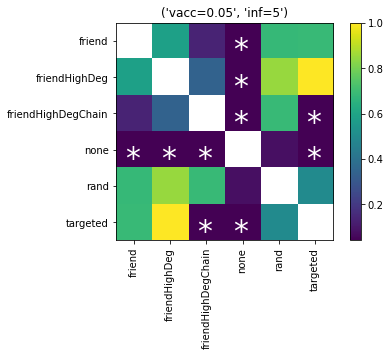

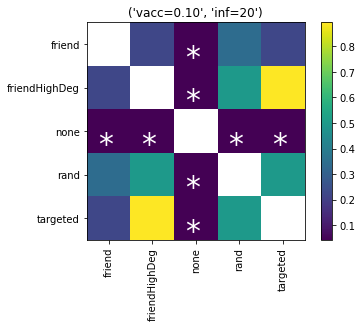

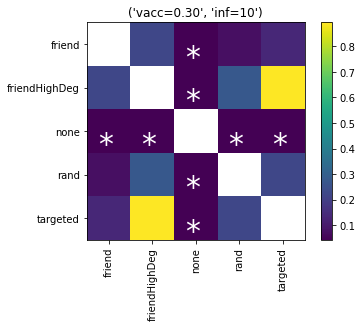

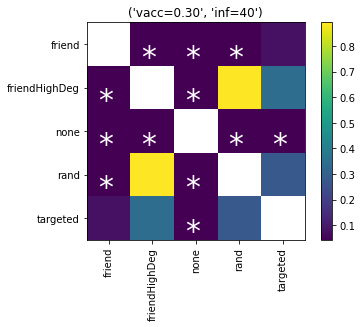

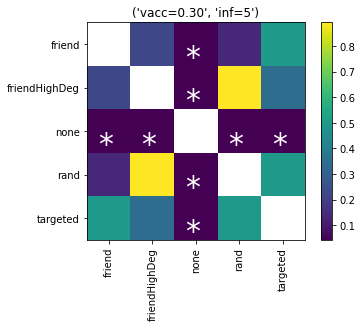

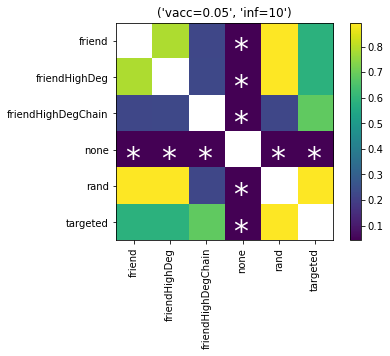

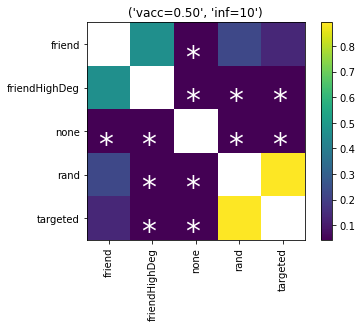

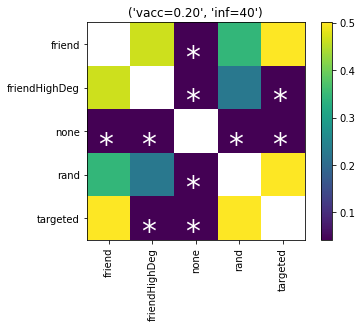

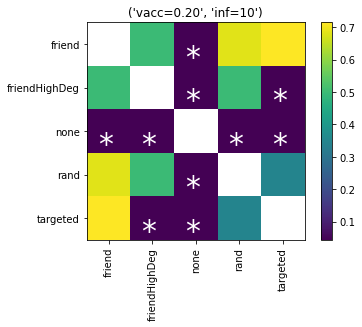

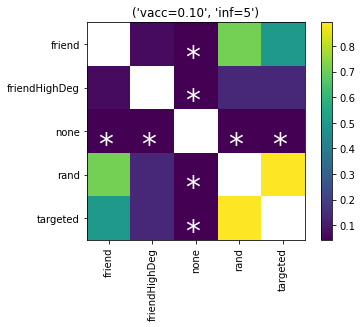

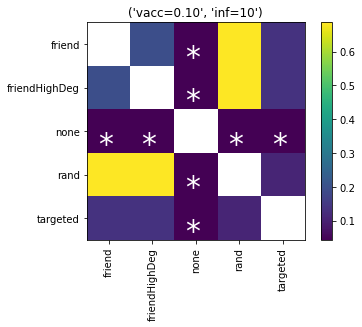

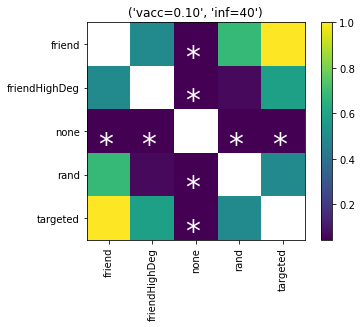

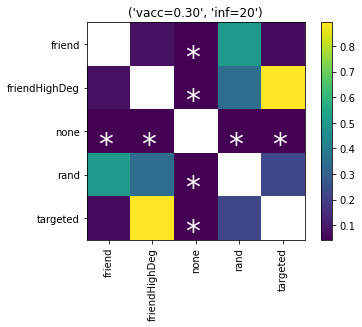

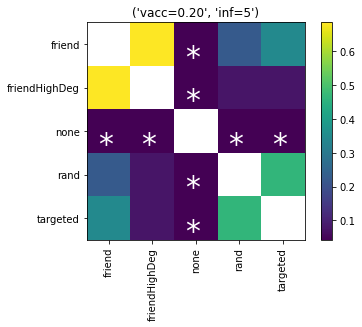

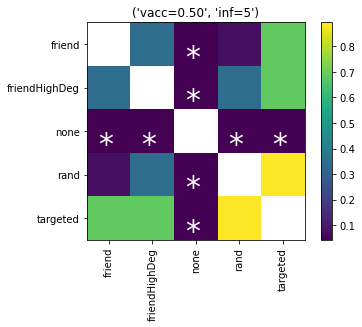

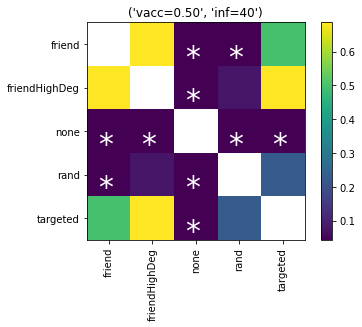

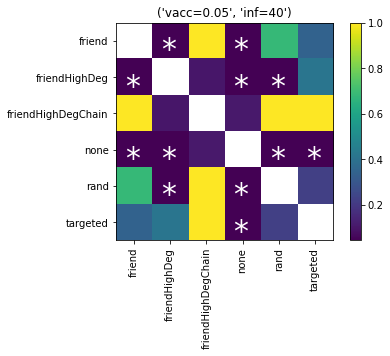

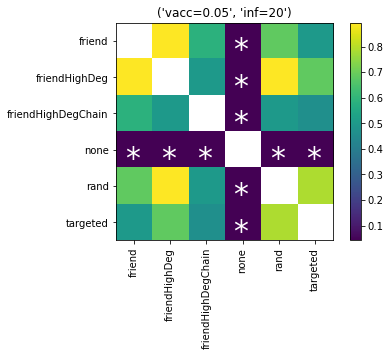

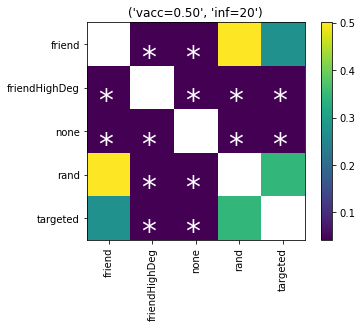

In [91]:
def istype(k, t):
    return tuple(list(k)[1:]) == t

from scipy.stats import wilcoxon

for t in types:

    wilcoxons = {}
    
    my_ks = set()

    for k1 in ks:
        if not istype(k1, t):
            continue
        my_ks.add(k1)
        for k2 in ks:
            if not istype(k2, t):
                continue
            if k1 == k2:
                val = np.nan
            else:
                arr1 = [ (m['numNodes'] - m['numS'])[-1] for m in models[k1] ]
                arr2 = [ (m['numNodes'] - m['numS'])[-1] for m in models[k2] ]
                
                if not len(arr1) or not len(arr2):
                    continue
                    
                newl = min(len(arr1), len(arr2))
                arr1 = arr1[:newl]
                arr2 = arr2[:newl]
                val = wilcoxon(arr1, arr2).pvalue
            wilcoxons[(k1,k2)] = val

    my_ks = sorted(my_ks)

    wilcox_mat = np.zeros((len(my_ks),len(my_ks)))

    for (k1,k2), val in wilcoxons.items():
        wilcox_mat[ 
            my_ks.index(k1),
            my_ks.index(k2)
        ] = val

    plt.imshow(wilcox_mat)
    plt.xticks(range(len(my_ks)),[x[0] for x in my_ks],rotation='vertical')
    plt.yticks(range(len(my_ks)),[x[0] for x in my_ks]);
    plt.colorbar();

    for ki1 in range(len(my_ks)):
        for ki2 in range(len(my_ks)):
            if wilcox_mat[ki1,ki2] < 0.05:
                plt.text( ki1-0.25, ki2+0.5, "*", color='white', size=30 )

    plt.title(t)
    plt.show()